In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

# 0. Data

Source & Description: https://archive.ics.uci.edu/dataset/352/online+retail

In [6]:
raw_df = pd.read_csv("./data.csv")

In [7]:
raw_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
raw_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
raw_df = raw_df.dropna(subset=['CustomerID'])

In [10]:
raw_df.shape

(406829, 8)

# 1. New vs. Repeat Customers

In [11]:
df = raw_df.dropna()

In [12]:
df = df.loc[
    df["Quantity"] > 0
]
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [13]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

/var/folders/cc/n153cd2x6qq8w175v23xx6zh0000gn/T/ipykernel_13109/3012402086.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [14]:
df["month"] = df["InvoiceDate"].dt.strftime("%Y-%m-01")

In [15]:
monthly_data = []

for each_month in sorted(df["month"].unique()):
    up_to_last_month_df = df.loc[
        df["month"] < each_month
    ]
    this_month_df = df.loc[
        df["month"] == each_month
    ]
    curr_customers = set(this_month_df["CustomerID"].unique())
    prev_customers = set(up_to_last_month_df["CustomerID"].unique())
    
    repeat_customers = curr_customers.intersection(prev_customers)
    new_customers = curr_customers - prev_customers
    
    curr_sales = this_month_df["Sales"].sum()
    
    sales_from_new_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(new_customers)
    ]["Sales"].sum()
    sales_from_repeat_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(repeat_customers)
    ]["Sales"].sum()
    
    avg_sales_from_new_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(new_customers)
    ]["Sales"].mean()
    avg_sales_from_repeat_customers = this_month_df.loc[
        this_month_df["CustomerID"].isin(repeat_customers)
    ]["Sales"].mean()
    
    monthly_data.append({
        "month": each_month,
        
        "num_customers": len(curr_customers),
        "repeat_customers": len(repeat_customers),
        "new_customers": len(new_customers),
        
        "curr_sales": curr_sales,
        "sales_from_new_customers": sales_from_new_customers,
        "sales_from_repeat_customers": sales_from_repeat_customers,
        "avg_sales_from_new_customers": avg_sales_from_new_customers,
        "avg_sales_from_repeat_customers": avg_sales_from_repeat_customers,
    })
        

In [16]:
monthly_data_df = pd.DataFrame(monthly_data).set_index("month").iloc[1:-1]
monthly_data_df["repeat_customer_percentage"] = monthly_data_df["repeat_customers"]/monthly_data_df["num_customers"]
monthly_data_df["repeat_sales_percentage"] = monthly_data_df["sales_from_repeat_customers"]/monthly_data_df["curr_sales"]

In [17]:
monthly_data_df

,num_customers,repeat_customers,new_customers,curr_sales,sales_from_new_customers,sales_from_repeat_customers,avg_sales_from_new_customers,avg_sales_from_repeat_customers,repeat_customer_percentage,repeat_sales_percentage
month,,,,,,,,,,
2011-01-01,741,324,417,569445.040,293207.350,276237.690,26.556231,27.106044,0.437247,0.485100
2011-02-01,758,378,380,447137.350,158142.070,288995.280,17.707096,26.279465,0.498681,0.646323
2011-03-01,974,522,452,595500.760,200069.960,395430.800,17.461159,25.156231,0.535934,0.664031
2011-04-01,856,556,300,469200.361,122011.491,347188.870,16.857073,22.535952,0.649533,0.739959
2011-05-01,1056,772,284,678594.560,124103.780,554490.780,20.275083,24.975937,0.731061,0.817116
2011-06-01,991,749,242,661213.690,135742.950,525470.740,23.764522,24.471231,0.755802,0.794706
2011-07-01,949,761,188,600091.011,74008.751,526082.260,14.825471,24.093531,0.801897,0.876671
2011-08-01,935,766,169,645343.900,79756.100,565587.800,16.420856,25.527523,0.819251,0.876413
2011-09-01,1266,967,299,952838.382,155103.901,797734.481,18.698481,25.137371,0.763823,0.837219


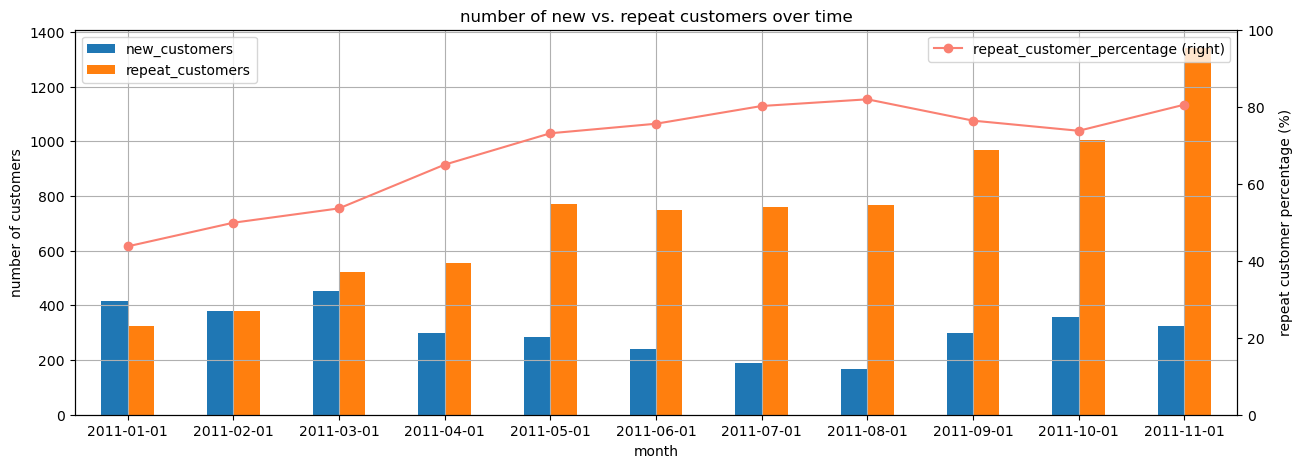

In [18]:
ax = monthly_data_df[[
    "new_customers", "repeat_customers"
]].plot(kind="bar", grid=True, figsize=(15,5))
(monthly_data_df["repeat_customer_percentage"]*100).plot(
    ax=ax, secondary_y=True, color="salmon", style="-o"
)
ax.right_ax.legend()
ax.right_ax.set_ylim([0, 100.0])
ax.right_ax.set_ylabel("repeat customer percentage (%)")
ax.set_ylabel("number of customers")
ax.set_title("number of new vs. repeat customers over time")
plt.show()

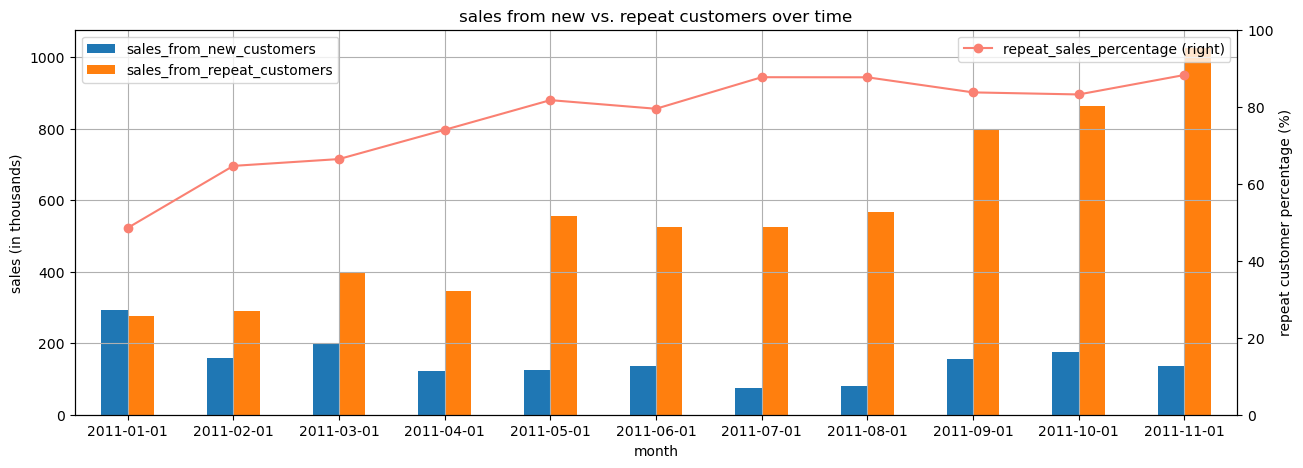

In [19]:
ax = (monthly_data_df[[
    "sales_from_new_customers", "sales_from_repeat_customers"
]]/1000).plot(kind="bar", grid=True, figsize=(15,5))

(monthly_data_df["repeat_sales_percentage"]*100).plot(
    ax=ax, secondary_y=True, color="salmon", style="-o"
)
ax.set_ylabel("sales (in thousands)")
ax.set_title("sales from new vs. repeat customers over time")
ax.right_ax.legend()
ax.right_ax.set_ylim([0, 100.0])
ax.right_ax.set_ylabel("repeat customer percentage (%)")
plt.show()

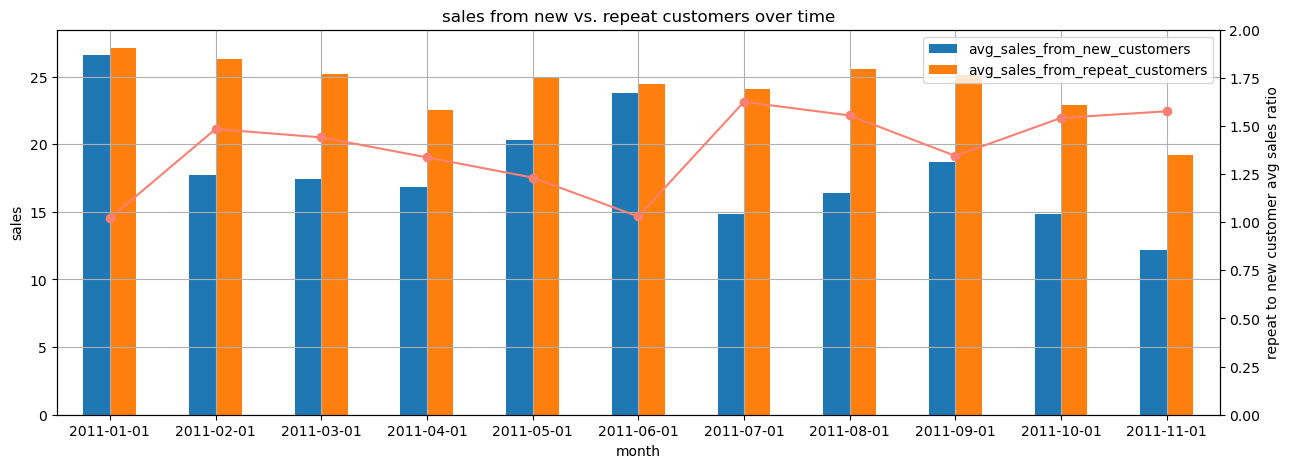

In [20]:
monthly_data_df["repeat_to_new_avg_sales_ratio"] = (
    monthly_data_df["avg_sales_from_repeat_customers"]
    /
    monthly_data_df["avg_sales_from_new_customers"]
)

ax = monthly_data_df[[
    "avg_sales_from_new_customers", "avg_sales_from_repeat_customers"
]].plot(kind="bar", grid=True, figsize=(15,5), rot=0)
ax.set_ylabel("sales")
ax.set_title("sales from new vs. repeat customers over time")

monthly_data_df["repeat_to_new_avg_sales_ratio"].plot(
    ax=ax, secondary_y=True, color="salmon", style="-o"
)
ax.right_ax.set_ylim([0, 2.0])
ax.right_ax.set_ylabel("repeat to new customer avg sales ratio")
plt.show()

In [21]:
monthly_data_df["repeat_to_new_avg_sales_ratio"]

month
2011-01-01    1.020704
2011-02-01    1.484121
2011-03-01    1.440697
2011-04-01    1.336884
2011-05-01    1.231854
2011-06-01    1.029738
2011-07-01    1.625144
2011-08-01    1.554579
2011-09-01    1.344354
2011-10-01    1.541864
2011-11-01    1.576202
Name: repeat_to_new_avg_sales_ratio, dtype: float64

# 2. Customer Segmentation with Purchase Behaviors

In [104]:
df = raw_df.copy()

## 2.1. Data Prep

In [105]:
df["CustomerID"].nunique()

4372

In [106]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [107]:
df.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [108]:
(df["Quantity"] < 0).sum()

8905

In [153]:
# Net Sales & Quantity
customer_net_df = df.groupby('CustomerID')[["Sales", "Quantity"]].sum()
customer_net_df.columns = ['NetSales', 'NetQuantity']

# Total Refunds
customer_refund_df = df.loc[
    df["Quantity"] < 0
].groupby("CustomerID")[["Sales", "Quantity"]].sum().abs()
customer_refund_df.columns = ['TotalRefund', 'TotalRefundQuantity']

customer_df = customer_net_df.merge(
    customer_refund_df, left_index=True, right_index=True, how="left"
).fillna(0)

In [154]:
customer_df

,NetSales,NetQuantity,TotalRefund,TotalRefundQuantity
CustomerID,,,,
12346.0,0.00,0,77183.60,74215.0
12347.0,4310.00,2458,0.00,0.0
12348.0,1797.24,2341,0.00,0.0
12349.0,1757.55,631,0.00,0.0
12350.0,334.40,197,0.00,0.0
...,...,...,...,...
18280.0,180.60,45,0.00,0.0
18281.0,80.82,54,0.00,0.0
18282.0,176.60,98,1.45,5.0


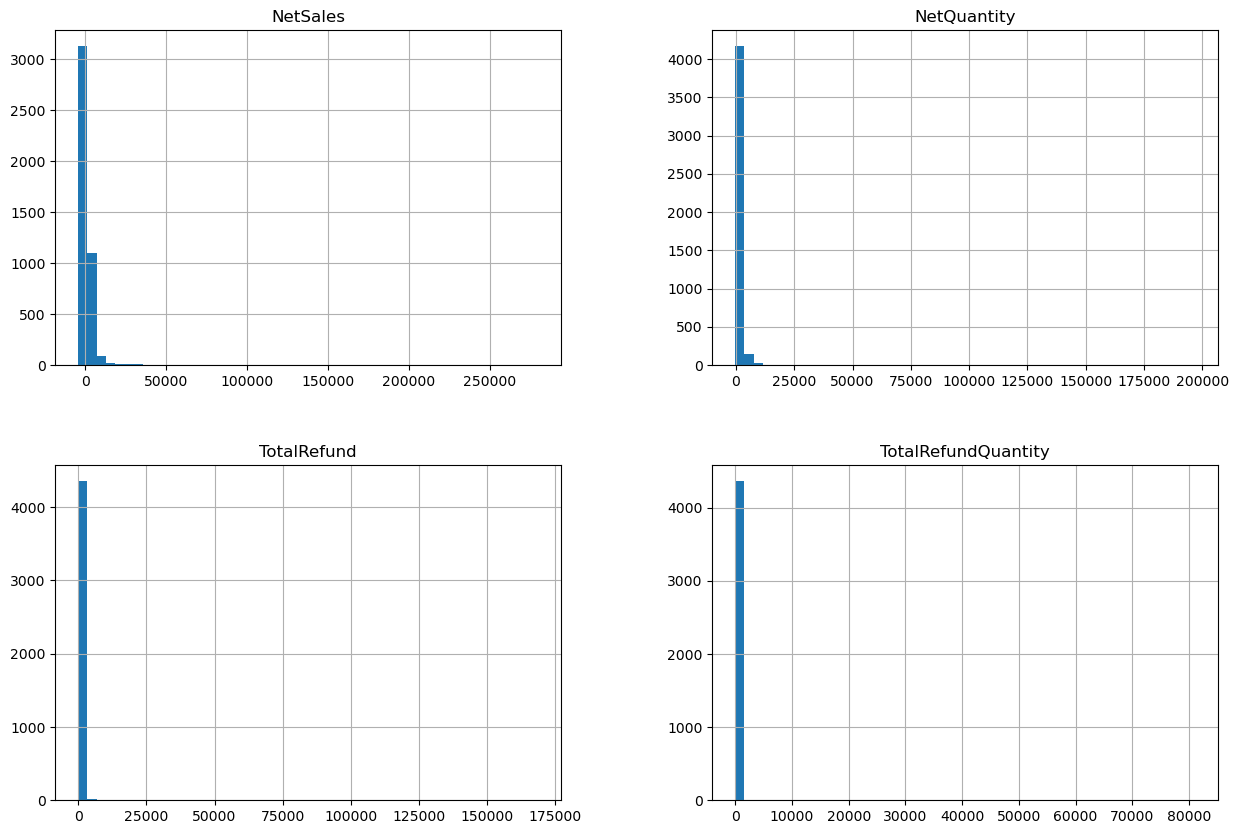

In [160]:
customer_df.hist(bins=50, figsize=(15,10))
plt.show()

In [161]:
log_customer_df = np.log(customer_df - customer_df.min() + 1)
log_customer_df.describe()

,NetSales,NetQuantity,TotalRefund,TotalRefundQuantity
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,8.616538,6.719784,1.334799,0.915773
std,0.363968,0.807619,1.988179,1.522898
min,0.000000,0.000000,0.000000,0.000000
25%,8.429889,6.124683,0.000000,0.000000
50%,8.504453,6.505784,0.000000,0.000000
75%,8.682768,7.143815,2.862201,1.609438
max,12.555946,12.191076,12.034517,11.302155


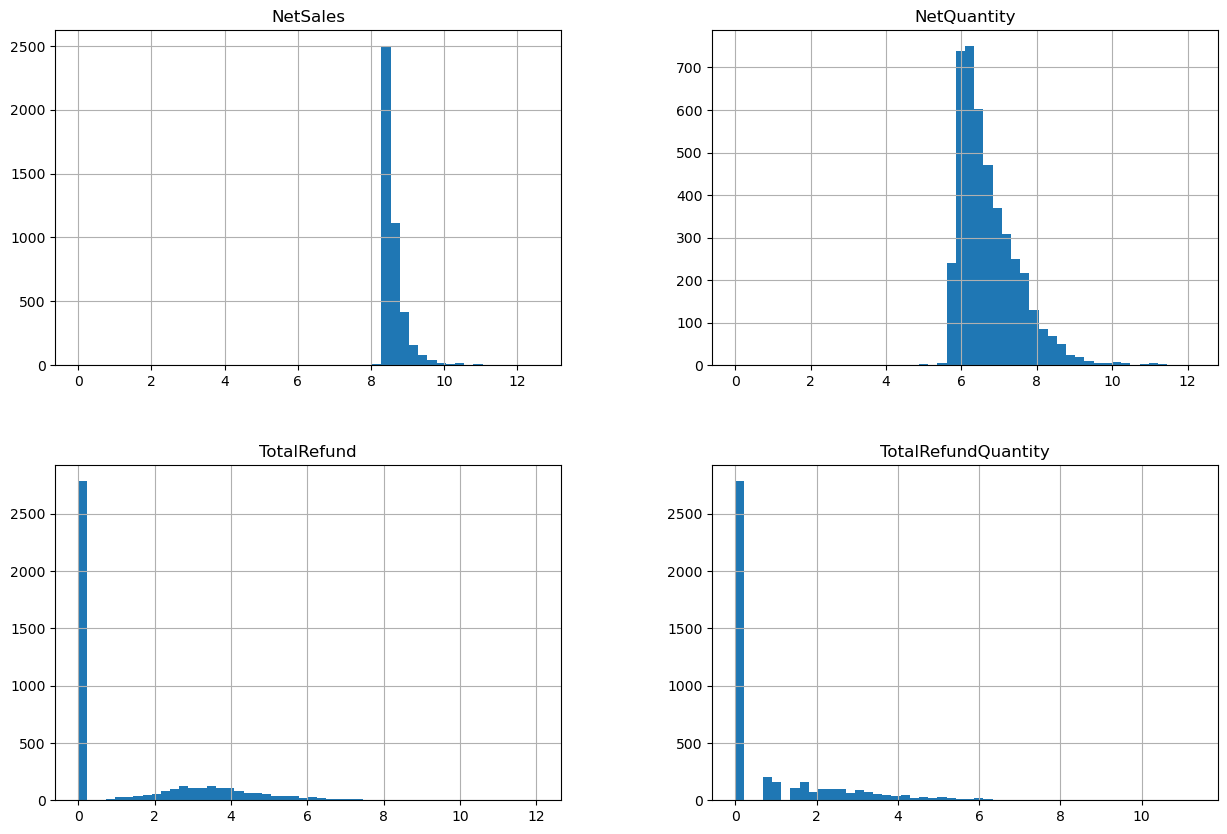

In [162]:
log_customer_df.hist(bins=50, figsize=(15,10))
plt.show()

## 2.2. K-Means Clustering

In [116]:
from sklearn.cluster import KMeans

In [117]:
import matplotlib.colors as mcolors

In [118]:
colors = list(mcolors.TABLEAU_COLORS.values())
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [119]:
def plot_clusters(c_df, col1, col2):
    clusters = sorted(c_df["cluster"].unique())
    for c in clusters:
        plt.scatter(
            c_df.loc[c_df['cluster'] == c][col1], 
            c_df.loc[c_df['cluster'] == c][col2],
            c=colors[c]
        )

    plt.title(f'{col1} vs. {col2} Clusters')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(clusters)
    plt.show()

### 2.2.1. Without Centering & Handling Skewness

In [137]:
COLS = ['NetSales', 'NetQuantity', 'TotalRefundQuantity']
kmeans = KMeans(
    n_clusters=4, n_init="auto"
).fit(
    customer_df[COLS]
)

In [138]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [139]:
kmeans.cluster_centers_

array([[1.37850682e+03, 8.20252998e+02, 5.22783672e+01],
       [1.29057952e+05, 6.86976000e+04, 1.42480000e+03],
       [3.93669997e+04, 2.57221379e+04, 1.38727586e+03],
       [2.67963755e+05, 1.30420500e+05, 3.87000000e+02]])

In [140]:
cluster_df = customer_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [141]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0    4336
1       5
2      29
3       2
Name: NetSales, dtype: int64

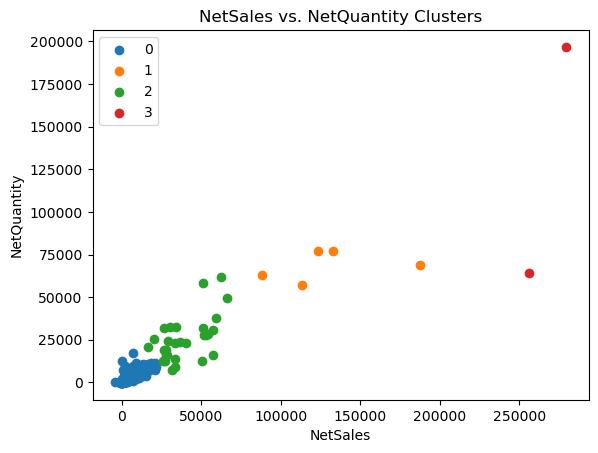

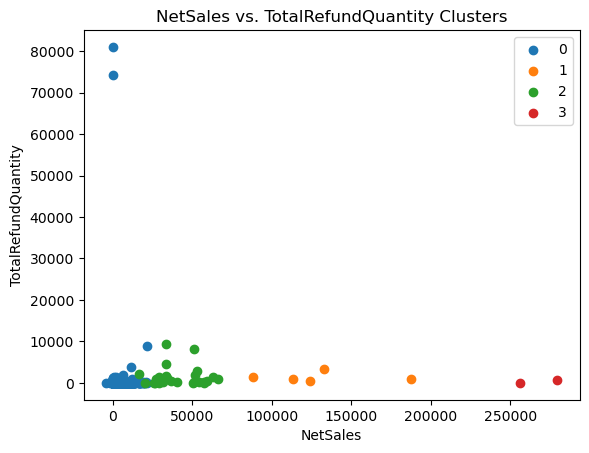

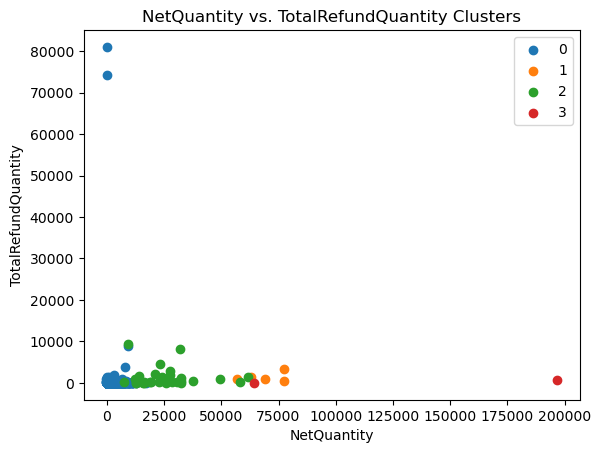

In [142]:
plot_clusters(cluster_df, "NetSales", "NetQuantity")
plot_clusters(cluster_df, "NetSales", "TotalRefundQuantity")
plot_clusters(cluster_df, "NetQuantity", "TotalRefundQuantity")

### 2.2.2. Log Transformed

In [216]:
COLS = ['NetSales', 'NetQuantity', 'TotalRefundQuantity']
kmeans = KMeans(
    n_clusters=4, n_init="auto"
).fit(
    log_customer_df[COLS]
)

In [217]:
cluster_df = log_customer_df[COLS].copy()
cluster_df["cluster"] = kmeans.labels_

In [218]:
cluster_df.groupby('cluster')['NetSales'].count()

cluster
0    2370
1     311
2     884
3     807
Name: NetSales, dtype: int64

In [219]:
cluster_df.groupby("cluster")[["NetSales", "NetQuantity", "TotalRefundQuantity"]].describe().T

cluster                              0           1           2           3
NetSales            count  2370.000000  311.000000  884.000000  807.000000
                    mean      8.450933    9.206248    8.718826    8.763581
                    std       0.185404    0.755714    0.268936    0.265585
                    min       0.000000    8.038005    8.309231    8.363723
                    25%       8.406942    8.651393    8.507660    8.612941
                    50%       8.439241    9.006611    8.657455    8.698993
                    75%       8.491442    9.522374    8.859421    8.842469
                    max       8.951388   12.555946    9.891717   12.471230
NetQuantity         count  2370.000000  311.000000  884.000000  807.000000
                    mean      6.224936    7.871021    7.051433    7.366099
                    std       0.282233    1.371139    0.707646    0.510951
                    min       5.710427    0.000000    5.455321    6.706862
                    25%       5.993961    7.051771    6.499411    7.003974
                    50%       6.196444    7.879670    7.033506    7.224025
                    75%       6.437351    8.659474    7.537563    7.613325
                    max       6.852243   12.191076    9.255123   11.073273
TotalRefundQuantity count  2370.000000  311.000000  884.000000  807.000000
                    mean      0.084293    4.905363    2.396754    0.197879
                    std       0.273342    1.258106    0.674237    0.393462
                    min       0.000000    2.890372    1.386294    0.000000
                    25%       0.000000    4.034201    1.791759    0.000000
                    50%       0.000000    4.653960    2.302585    0.000000
                    75%       0.000000    5.488929    2.944439    0.000000
                    max       1.386294   11.302155    4.290459    1.386294

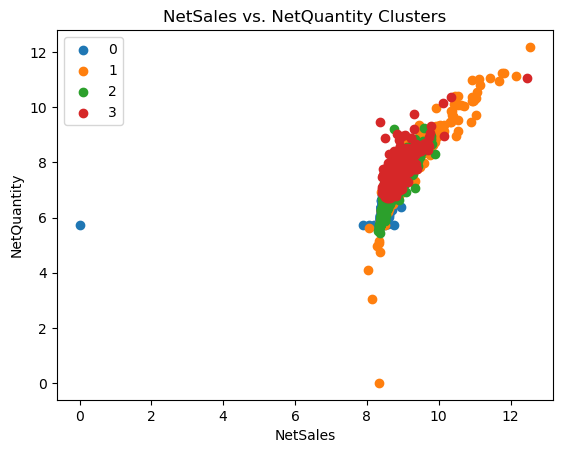

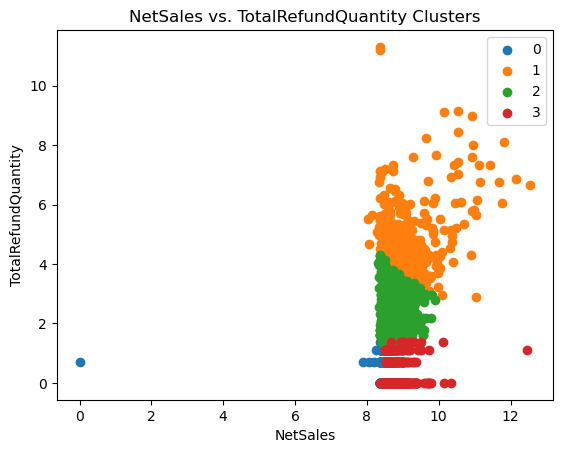

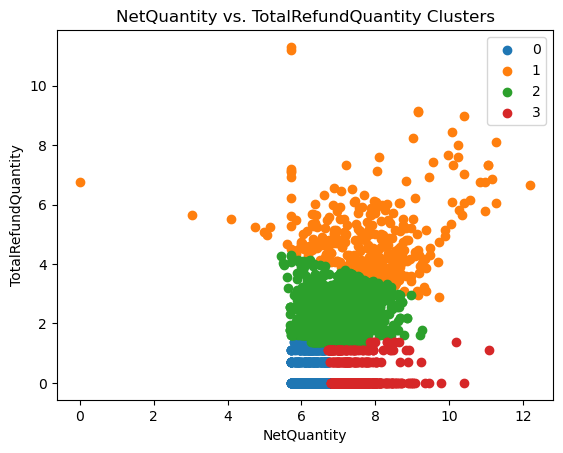

In [220]:
plot_clusters(cluster_df, "NetSales", "NetQuantity")
plot_clusters(cluster_df, "NetSales", "TotalRefundQuantity")
plot_clusters(cluster_df, "NetQuantity", "TotalRefundQuantity")

### 2.2.3. Finding the Best Number of Clusters

In [221]:
from sklearn.metrics import silhouette_score
silhouette_score(
    log_customer_df[COLS], 
    kmeans.labels_
)

0.4986290441626133

In [210]:
import matplotlib.cm as cm

Silhouette Score for 4 Clusters: 0.4980
Silhouette Score for 5 Clusters: 0.5337
Silhouette Score for 6 Clusters: 0.5149
Silhouette Score for 7 Clusters: 0.4524
Silhouette Score for 8 Clusters: 0.4494


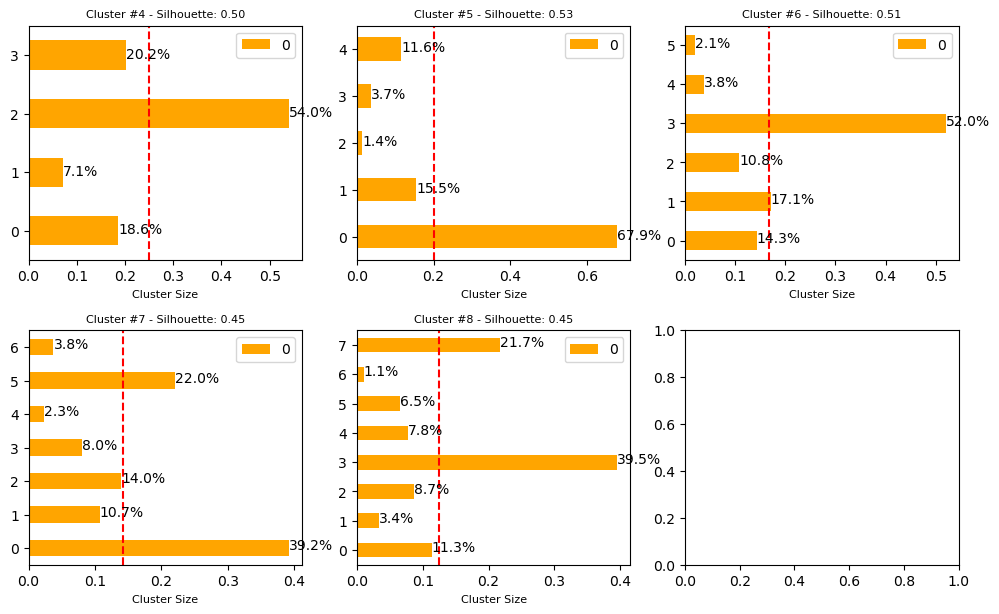

In [236]:
COLS = ['NetSales', 'NetQuantity', 'TotalRefundQuantity']

f, axes = plt.subplots(2, 3, sharey=False, figsize=(12, 7))

for i, n_cluster in enumerate([4,5,6,7,8]):
    kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
        log_customer_df[COLS]
    )
    silhouette_avg = silhouette_score(
        log_customer_df[COLS], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))
    
    each_cluster_size = [
        (kmeans.labels_ == i).sum()/len(kmeans.labels_) for i in range(n_cluster)
    ]
    ax = axes[i//3][i%3]
    pd.DataFrame(each_cluster_size).plot(ax=ax, kind="barh", color="orange")
    for p in ax.patches:
        ax.annotate(f'{p.get_width()*100:.01f}%', (p.get_width(), p.get_y()+0.2))
    ax.axvline(x=(1/n_cluster), color="red", linestyle="--")
    ax.set_xlabel("Cluster Size", size=8)
    ax.set_title(f"Cluster #{n_cluster} - Silhouette: {silhouette_avg:.02f}")
    ax.title.set_size(8)
f.subplots_adjust(hspace=0.3)
plt.show()

# 3. Customer Segmentation with Product Interests

In [11]:
df = raw_df.copy()

In [12]:
df["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [13]:
customer_item_df = pd.DataFrame(
    df.groupby("CustomerID")["Description"].apply(lambda x: ", ".join(list(set(x))))
)

In [14]:
customer_item_df

,Description
CustomerID,
12346.0,MEDIUM CERAMIC TOP STORAGE JAR
12347.0,"PINK DRAWER KNOB ACRYLIC EDWARDIAN, SET 40 HEA..."
12348.0,"ICE CREAM PEN LIP GLOSS , PACK OF 72 SKULL CAK..."
12349.0,"TEA TIME TEAPOT IN GIFT BOX, SWEETHEART WALL T..."
12350.0,"PLASTERS IN TIN SPACEBOY, PINK/PURPLE RETRO RA..."
...,...
18280.0,"VINTAGE UNION JACK SHOPPING BAG, GUMBALL COAT ..."
18281.0,"GUMBALL COAT RACK, ROBOT BIRTHDAY CARD, PENNY ..."
18282.0,"REGENCY MILK JUG PINK , REGENCY SUGAR BOWL GRE..."


## 3.1. Embedding Vectors

In [17]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [18]:
from sentence_transformers import SentenceTransformer, util

In [20]:
embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [21]:
%%time

encoded = embedding_model.encode(
    list(customer_item_df["Description"]), 
    show_progress_bar=True
)

Batches:   0%|          | 0/137 [00:00<?, ?it/s]

CPU times: user 21.8 s, sys: 3.44 s, total: 25.2 s
Wall time: 34.2 s


In [23]:
with open('tmp.npy', 'wb') as f:
    np.save(f, encoded)

## 3.2. Clustering

In [15]:
with open('tmp.npy', 'rb') as f:
    encoded = np.load(f)

In [16]:
encoded

array([[ 0.0159037 ,  0.06054777, -0.0703283 , ..., -0.08511787,
        -0.04072579,  0.0284576 ],
       [ 0.0529712 ,  0.00404639,  0.01612677, ...,  0.01493973,
        -0.0549878 , -0.03948448],
       [ 0.01547895,  0.05960289,  0.05209005, ..., -0.00028022,
        -0.02841885,  0.007029  ],
       ...,
       [ 0.04826356,  0.01042163,  0.02237122, ..., -0.00151339,
        -0.04589121, -0.02092332],
       [ 0.00709407,  0.04814486,  0.01566913, ...,  0.01603726,
        -0.00881494, -0.02774446],
       [ 0.00555833,  0.04056115,  0.04192369, ...,  0.00726212,
        -0.00601238,  0.00459251]], dtype=float32)

In [17]:
encoded.shape

(4372, 384)

### 3.2.1. Dimensionality Reduction

In [18]:
from sklearn.decomposition import PCA

In [24]:
%%time

pca = PCA(n_components=5)
transforemd_encoded = pca.fit_transform(encoded)

CPU times: user 105 ms, sys: 151 ms, total: 256 ms
Wall time: 24 ms


In [25]:
pca.explained_variance_ratio_

array([0.11266083, 0.05905784, 0.0500991 , 0.04061131, 0.03258873],
      dtype=float32)

In [26]:
pca.singular_values_

array([13.090548,  9.477857,  8.729439,  7.859499,  7.040526],
      dtype=float32)

In [27]:
transforemd_encoded.shape

(4372, 5)

### 3.2.2. K-Means Clustering

In [28]:
from sklearn.cluster import KMeans

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
from collections import Counter

In [47]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
        transforemd_encoded
    )
    
    silhouette_avg = silhouette_score(
        transforemd_encoded, 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))


Silhouette Score for 4 Clusters: 0.1881
Silhouette Score for 5 Clusters: 0.2120
Silhouette Score for 6 Clusters: 0.2149
Silhouette Score for 7 Clusters: 0.2152
Silhouette Score for 8 Clusters: 0.2105


In [48]:
n_cluster = 7
kmeans = KMeans(n_clusters=n_cluster, n_init="auto").fit(
    transforemd_encoded
)

In [49]:
customer_item_df["cluster"] = kmeans.labels_

In [51]:
n_items = 5
common_items = []
for i in range(n_cluster):
    most_common_items = Counter(list(df.set_index("CustomerID").loc[
            customer_item_df.loc[
            customer_item_df["cluster"] == i
        ].index
    ]["Description"])).most_common(n_items)
    
    common_items.append({
        f"item_{j}": most_common_items[j][0] for j in range(n_items)
    })

In [53]:
common_items_df = pd.DataFrame(common_items)

In [54]:
common_items_df

,item_0,item_1,item_2,item_3,item_4
0,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,ASSORTED COLOUR BIRD ORNAMENT,WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE
1,POSTAGE,JUMBO BAG RED RETROSPOT,BAKING SET 9 PIECE RETROSPOT,PARTY BUNTING,VINTAGE SNAP CARDS
2,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,VICTORIAN GLASS HANGING T-LIGHT
3,JUMBO BAG RED RETROSPOT,LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,POSTAGE,LUNCH BAG SPACEBOY DESIGN
4,HOT WATER BOTTLE KEEP CALM,Manual,CHILLI LIGHTS,CHOCOLATE HOT WATER BOTTLE,HOT WATER BOTTLE TEA AND SYMPATHY
5,WHITE HANGING HEART T-LIGHT HOLDER,PAPER CHAIN KIT 50'S CHRISTMAS,REGENCY CAKESTAND 3 TIER,ASSORTED COLOUR BIRD ORNAMENT,PARTY BUNTING
6,PAPER CHAIN KIT 50'S CHRISTMAS,WHITE HANGING HEART T-LIGHT HOLDER,PAPER CHAIN KIT VINTAGE CHRISTMAS,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN HEART CHRISTMAS SCANDINAVIAN
